### Implementing Multiple Linear Regression

In [53]:
# Importing all the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [54]:
#import dataset
dataset = pd.read_csv('Dataset_Dec.csv')

In [55]:
len(dataset)

3185

In [56]:
dataset.head()

,Area,Year,Item,Area Harvested,Yield,Production
0,Bangladesh,1961,Areca nuts,82600,7627,62995
1,Bangladesh,1961,Bananas,33600,132738,446000
2,Bangladesh,1961,Barley,29947,5768,17272
3,Bangladesh,1961,"Bastfibres, others",30900,11117,34350
4,Bangladesh,1961,"Beans, dry",68798,7236,49784


In [57]:
dataset.shape

(3185, 6)

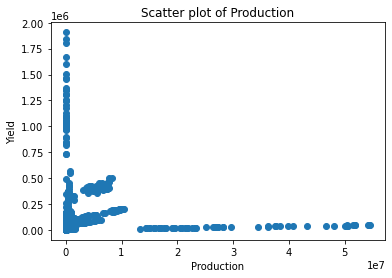

In [58]:
plt.scatter(dataset['Production'],dataset['Yield'], alpha=1)
plt.title('Scatter plot of Production')
plt.xlabel('Production')
plt.ylabel('Yield')
plt.show()

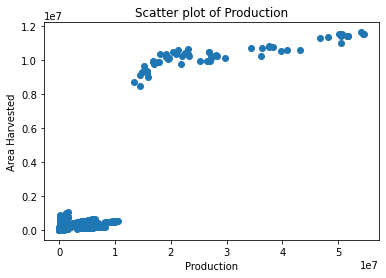

In [59]:
plt.scatter(dataset['Production'],dataset['Area Harvested'], alpha=1)
plt.title('Scatter plot of Production')
plt.xlabel('Production')
plt.ylabel('Area Harvested')
plt.show()

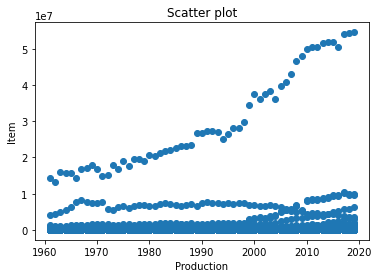

In [60]:
plt.scatter(dataset['Year'],dataset['Production'], alpha=1)
plt.title('Scatter plot')
plt.xlabel('Production')
plt.ylabel('Item')
plt.show()

Text(0, 0.5, 'Production')

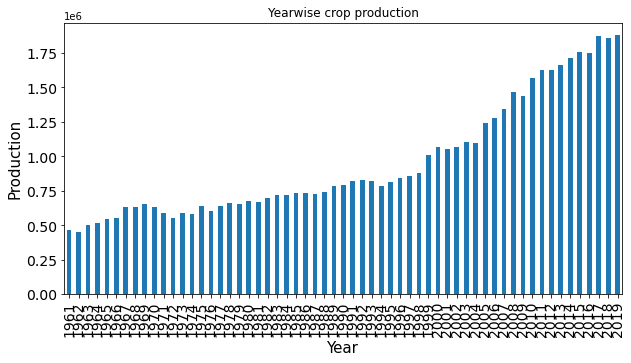

In [61]:
# create the figure object
ax = dataset.groupby(['Year'])['Production'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# set title
ax.set_title("Yearwise crop production")

# set x and y label
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("Production", fontsize = 15)


In [62]:
dataset.Year.value_counts()

1961    54
2005    54
1993    54
1994    54
1995    54
1996    54
1997    54
1998    54
1999    54
2000    54
2001    54
2002    54
2003    54
2004    54
2006    54
1991    54
2007    54
2008    54
2009    54
2010    54
2011    54
2012    54
2013    54
2014    54
2015    54
2016    54
2017    54
2018    54
1992    54
2019    54
1962    54
1975    54
1963    54
1964    54
1965    54
1966    54
1967    54
1968    54
1969    54
1970    54
1971    54
1972    54
1973    54
1974    54
1976    54
1989    54
1977    54
1978    54
1979    54
1980    54
1981    54
1982    54
1983    54
1984    54
1985    54
1986    54
1987    54
1988    54
1990    53
Name: Year, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
# first 5 cols as train as input, last col as output
X_train,X_test,y_train,y_test = train_test_split(dataset.iloc[:,0:5],dataset.iloc[:,-1],test_size=0.2,random_state=2)

In [79]:
from sklearn.preprocessing import OneHotEncoder
# object
# multicollinearity removal
# removing the catagories from the columns with drop first
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [80]:
X_train_new = ohe.fit_transform(X_train[['Area','Item']])
# we get the no. of cols depending on the categories
X_train_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [82]:
X_test_new = ohe.transform(X_test[['Area','Item']])
X_test_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [84]:
# now to append everything together
dataset = np.hstack((X_train[['Year','Area Harvested','Yield']].values,X_train_new))
dataset

KeyError: "['Year'] not in index"

In [65]:
dependent_variables = 'Production'

In [66]:
independent_variables = dataset.columns.tolist()

In [67]:
independent_variables.remove(dependent_variables)

In [68]:
independent_variables

['Area',
 'Item',
 'Area Harvested',
 'Yield',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [70]:
# create the data of independent variables
X = dataset[independent_variables].values

# dependent variable data
y = dataset[dependable_variable]

In [71]:
# split and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

In [72]:
# transform the data
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

ValueError: could not convert string to float: 'Bangladesh'